In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listing = pd.read_csv('listings_detailed.csv')

In [3]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

Let's convert the price to float so we can do further analysis

In [4]:
listing.price = listing.price.str.replace('$','')

In [5]:
listing.price.unique()

array(['60.00', '31.00', '50.00', '92.00', '26.00', '85.00', '65.00',
       '54.00', '1,400.00', '79.00', '90.00', '82.00', '40.00', '24.00',
       '21.00', '51.00', '75.00', '139.00', '80.00', '63.00', '46.00',
       '125.00', '114.00', '70.00', '45.00', '19.00', '96.00', '105.00',
       '20.00', '32.00', '44.00', '148.00', '30.00', '69.00', '91.00',
       '120.00', '72.00', '18.00', '55.00', '28.00', '214.00', '94.00',
       '101.00', '25.00', '43.00', '61.00', '88.00', '95.00', '67.00',
       '64.00', '110.00', '68.00', '71.00', '59.00', '175.00', '106.00',
       '37.00', '89.00', '172.00', '200.00', '87.00', '35.00', '77.00',
       '166.00', '223.00', '100.00', '42.00', '56.00', '140.00', '58.00',
       '57.00', '103.00', '49.00', '15.00', '121.00', '74.00', '76.00',
       '38.00', '97.00', '48.00', '84.00', '17.00', '34.00', '300.00',
       '99.00', '134.00', '78.00', '9,999.00', '86.00', '190.00',
       '165.00', '33.00', '23.00', '14.00', '279.00', '10.00', '29.00',

Let's count the number of comma in each rows to check for thousands delimiter

In [6]:
def count(L):
    a=0
    for i in range(len(L)):
        if L[i]==',':
            a=a+1
    return a

In [7]:
listing['comma_count'] = listing.price.apply(count)

In [8]:
listing.comma_count.unique()

array([0, 1], dtype=int64)

Let's remove the point and then replace the comma by a point in the rows with one coma

In [9]:
listing.loc[listing.comma_count == 1,'price'] = listing.loc[listing.comma_count == 1,'price'].str.replace('.','')

In [10]:
listing.loc[listing.comma_count == 1,'price'] = listing.loc[listing.comma_count == 1,'price'].str.replace(',','.')

Now let's convert type to float

In [11]:
listing.price = listing.price.astype('float')

Finally let's multiply by 1000 the figures which had a comma

In [12]:
listing.loc[listing.comma_count == 1,'price'] = listing.loc[listing.comma_count == 1,'price']*1000

now we can remove the column "comma_count"

In [13]:
listing.drop(columns='comma_count',inplace=True)

In [14]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

Now let's drop the eventual duplicates

In [15]:
listing.drop_duplicates(keep='first',inplace=True)

In [16]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

Let's look for outliers now

In [17]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.961800e+04,1.961800e+04,1.961800e+04,19091.000000,19091.000000,19618.000000,19618.000000,19618.000000,0.0,18123.000000,...,13704.000000,13703.000000,13703.000000,13700.000000,13699.000000,19618.000000,19618.000000,19618.000000,19618.000000,13981.000000
mean,2.912200e+07,2.021041e+13,1.312165e+08,12.114557,12.114557,40.420984,-3.694040,3.110154,NaN,1.440821,...,9.339682,9.644749,9.643655,9.657518,9.177166,10.229177,8.219645,1.755582,0.169691,1.125958
std,1.351839e+07,0.000000e+00,1.166790e+08,101.803820,101.803820,0.022627,0.028671,1.963693,NaN,0.829369,...,1.087092,0.898459,0.922123,0.783949,1.078839,23.546472,22.727000,5.147105,1.654240,1.348235
min,6.369000e+03,2.021041e+13,7.952000e+03,0.000000,0.000000,40.332210,-3.863910,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.903424e+07,2.021041e+13,2.765313e+07,1.000000,1.000000,40.409393,-3.707700,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.170000
50%,3.187506e+07,2.021041e+13,9.901898e+07,2.000000,2.000000,40.419735,-3.701120,2.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.590000
75%,4.090994e+07,2.021041e+13,2.256898e+08,6.000000,6.000000,40.430290,-3.685420,4.000000,NaN,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,3.000000,1.000000,0.000000,1.630000
max,4.918779e+07,2.021041e+13,3.964281e+08,7755.000000,7755.000000,40.562740,-3.531900,16.000000,NaN,15.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,163.000000,163.000000,46.000000,29.000000,16.220000


In [18]:
listing['price'].describe()

count    19618.000000
mean       129.271740
std        484.143545
min          0.000000
25%         35.000000
50%         58.000000
75%        100.000000
max       9999.000000
Name: price, dtype: float64

Let's count the number of outliers other 3000$

In [19]:
listing[listing.price > 3000]['price'].count()

59

Let's get rid of those outliers as they don't make sense with madrid prices.

In [20]:
listing = listing[~(listing.price > 3000)]

1) Let's get the 10 most expensive neighbourhood by average price

In [21]:
top_10_avg_price_neigh = listing.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False).nlargest(10)

In [22]:
top_10_avg_price_neigh.to_frame()

,price
neighbourhood_cleansed,
Hellín,484.677419
Rosas,428.275000
Canillejas,422.750000
Arcos,372.644068
Simancas,311.750000
Valdefuentes,220.828571
Piovera,218.516129
San Pascual,210.975610
Amposta,209.875000


C:\Users\chimb\AppData\Local\Temp\ipykernel_63620\1026177916.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


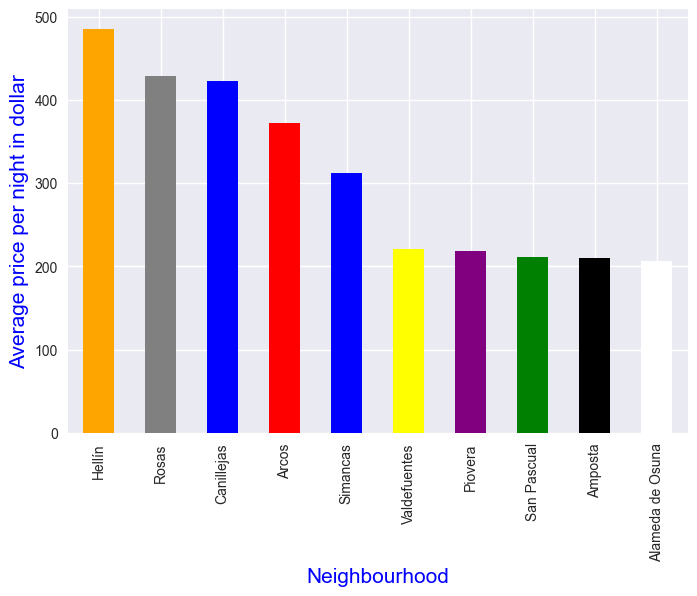

In [23]:
plt.style.use('seaborn')
top_10_avg_price_neigh.plot(kind='bar',color = ['orange','grey','blue','red','blue','yellow','purple','green','black','white'])
plt.ylabel('Average price per night in dollar',size=15,color='blue')
plt.xlabel('Neighbourhood',size=15,color='blue')
plt.show()

Let's check the neighbourhoods with the less flat so the average is not based on few elements.

In [24]:
listing.groupby('neighbourhood_cleansed').id.count().sort_values().nsmallest(20)

neighbourhood_cleansed
Atalaya              1
Horcajo              2
El Pardo             3
Valdemarín           5
Fuentelareina        5
El Plantío           6
Pavones              7
Santa Eugenia        9
Aeropuerto          11
Corralejos          14
El Goloso           15
Colina              15
Orcasitas           15
Cuatro Vientos      16
Amposta             16
Butarque            17
Vinateros           17
Estrella            20
San Cristobal       20
Apostol Santiago    21
Name: id, dtype: int64

The most expensive neighbourhoods are __Hellin and Rosas__ as they have enough differents rooms in the dataset

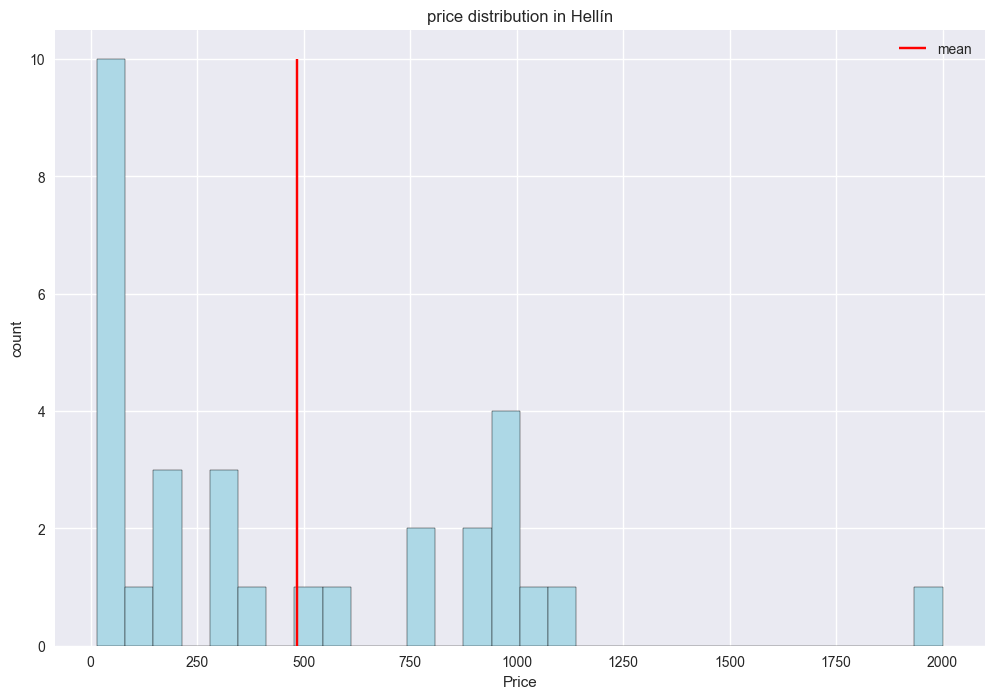

In [90]:
plt.figure(figsize=(12,8))
plt.hist(listing[listing.neighbourhood_cleansed == 'Hellín']['price'],bins=30,color='lightblue', edgecolor='black')
plt.vlines(np.mean(listing[listing.neighbourhood_cleansed == 'Hellín']['price']),ymin=0,ymax=10,label='mean',colors='red')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.title('price distribution in Hellín')
plt.show()

2) Let's get the 10 less expensive neighbourhood by average price

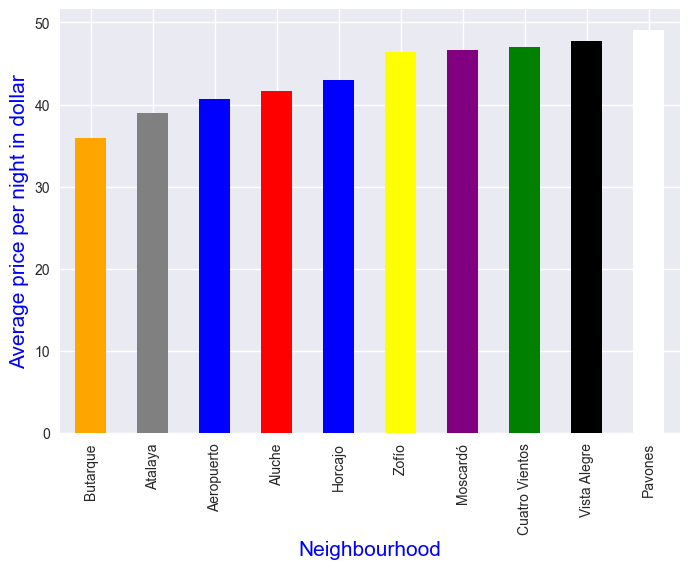

In [26]:
last_10_avg_price_neigh = listing.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False).nsmallest(10)
last_10_avg_price_neigh.plot(kind='bar',color = ['orange','grey','blue','red','blue','yellow','purple','green','black','white'])
plt.ylabel('Average price per night in dollar',size=15,color='blue')
plt.xlabel('Neighbourhood',size=15,color='blue')
plt.show()

In [27]:
listing.groupby('neighbourhood_cleansed').id.count().sort_values().nsmallest(20)

neighbourhood_cleansed
Atalaya              1
Horcajo              2
El Pardo             3
Valdemarín           5
Fuentelareina        5
El Plantío           6
Pavones              7
Santa Eugenia        9
Aeropuerto          11
Corralejos          14
El Goloso           15
Colina              15
Orcasitas           15
Cuatro Vientos      16
Amposta             16
Butarque            17
Vinateros           17
Estrella            20
San Cristobal       20
Apostol Santiago    21
Name: id, dtype: int64

Atalaya, Horcajo and Pavones having less than 7 reviews aren't going to be counted. So based on districts with enought data in the dataset, __Butarque, Aeropuerto and Aluche__ are the cheapest.

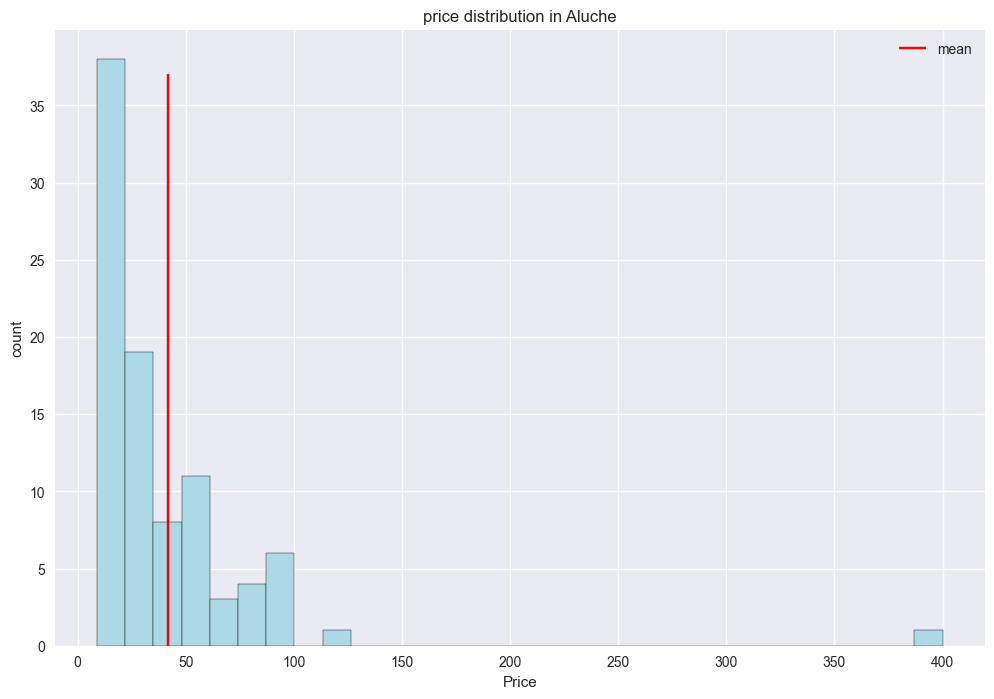

In [91]:
plt.figure(figsize=(12,8))
plt.hist(listing[listing.neighbourhood_cleansed == 'Aluche']['price'],bins=30,color='lightblue', edgecolor='black')
plt.vlines(np.mean(listing[listing.neighbourhood_cleansed == 'Aluche']['price']),ymin=0,ymax=37,label='mean',colors='red')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.title('price distribution in Aluche')
plt.show()

3) What is the average number of bedrooms in the listings?

In [29]:
listing.bedrooms.mean()

1.437925499529529

the average is 1.440821056116537 bedroom

Let's look at the distribution

Text(0.5, 1.0, 'Number of bedroom distribution')

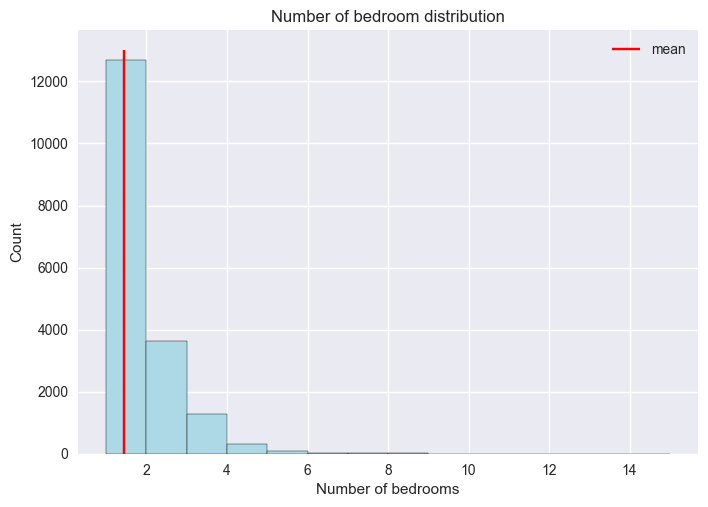

In [92]:
plt.hist(listing['bedrooms'],bins=14,color='lightblue', edgecolor='black')
plt.vlines(np.mean(listing['bedrooms']),ymin=0,ymax=13000,label='mean',colors='red')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.legend()
plt.title('Number of bedroom distribution')

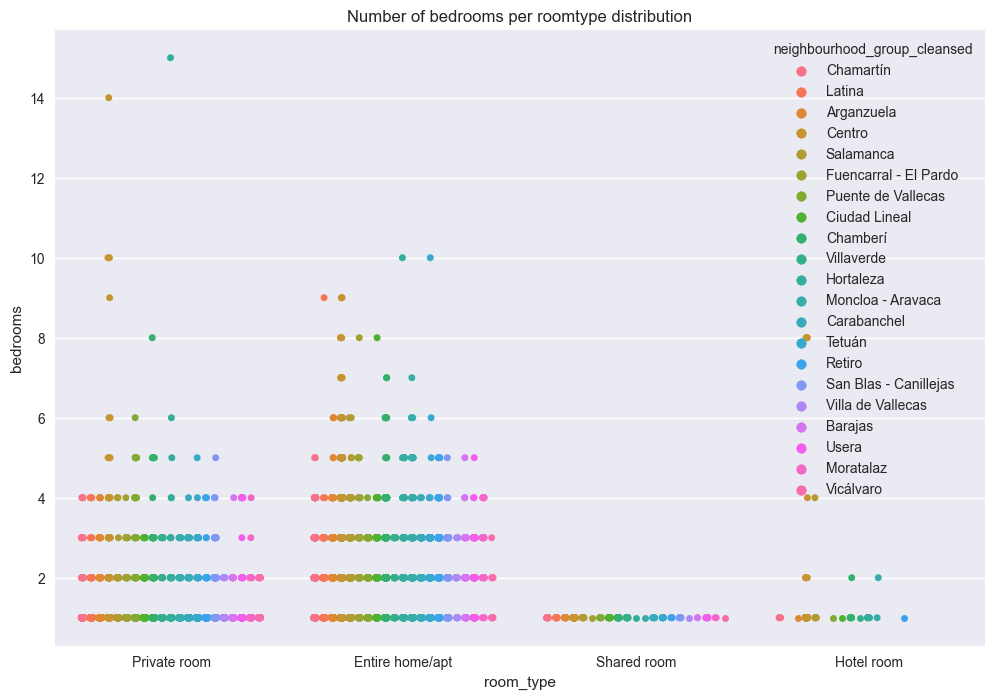

In [31]:
plt.figure(figsize=(12,8))
sns.stripplot(listing,x='room_type',y='bedrooms',hue='neighbourhood_group_cleansed',dodge=True)
plt.title('Number of bedrooms per roomtype distribution')
plt.show()

The most common number of bedrooms is between 1 and 2

4) What is the most common room_type in the dataset, and how many listings have this room type?

In [32]:
listing.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [33]:
number_per_roomtype = listing.groupby('room_type').id.count().sort_values(ascending=False)

In [34]:
number_per_roomtype

room_type
Entire home/apt    11262
Private room        7806
Shared room          329
Hotel room           162
Name: id, dtype: int64

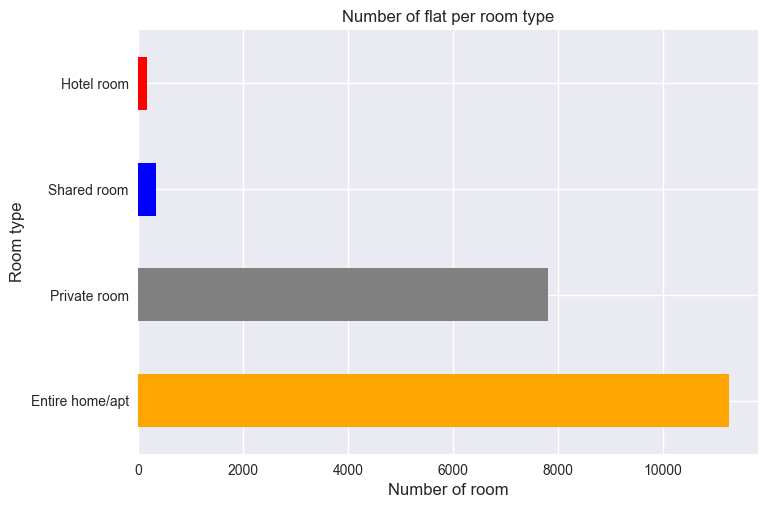

In [35]:

number_per_roomtype.plot(kind='barh',color=['orange','grey','blue','red','blue','yellow','purple','green','black','white'])
plt.title('Number of flat per room type',size=12)
plt.xlabel('Number of room',size=12)
plt.ylabel('Room type',size=12)
plt.show()

It's mainly Private room and Entire home

5) What is the average review_scores_rating for the listings that have reviews?

In [36]:
listing[~(listing.review_scores_rating.isna())].review_scores_rating.mean()

92.45694637500914

The average score is 92.46211624006418

6) What is the top 10 average score of rating per neighbourhood?

In [37]:
top_10_neigh_rate = listing.groupby('neighbourhood_cleansed').review_scores_rating.mean().sort_values(ascending=False).nlargest(10)

In [38]:
top_10_neigh_rate.to_frame()

,review_scores_rating
neighbourhood_cleansed,
Horcajo,100.000000
Valdemarín,100.000000
Hellín,98.583333
Amposta,98.222222
Corralejos,98.000000
Ambroz,97.166667
Peñagrande,97.027027
Campamento,96.941176
Estrella,96.785714


C:\Users\chimb\AppData\Local\Temp\ipykernel_63620\439910688.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


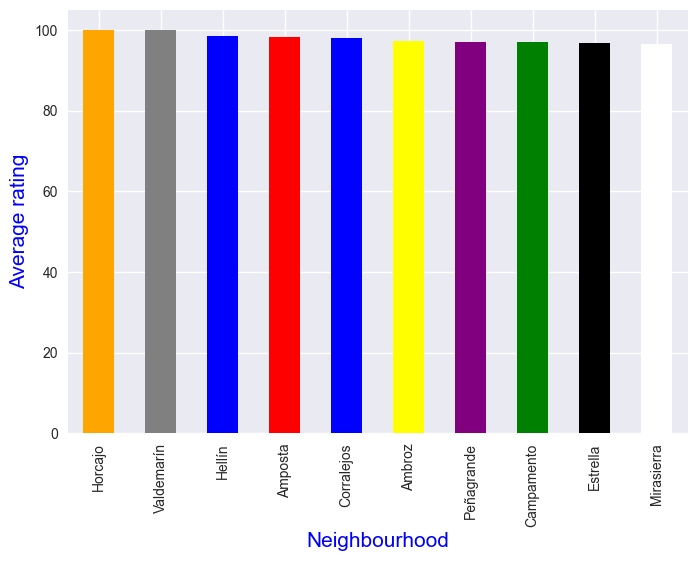

In [39]:
plt.style.use('seaborn')
top_10_neigh_rate.plot(kind='bar',color = ['orange','grey','blue','red','blue','yellow','purple','green','black','white'])
plt.ylabel('Average rating',size=15,color='blue')
plt.xlabel('Neighbourhood',size=15,color='blue')
plt.show()

Let's look at the __number of rating__ for the least rated neighbourhoods

In [40]:
listing.groupby('neighbourhood_cleansed').number_of_reviews.sum().sort_values(ascending=False).nsmallest(10).to_frame()

,number_of_reviews
neighbourhood_cleansed,
Atalaya,0
Horcajo,1
Valdemarín,2
Fuentelareina,6
Pavones,13
El Pardo,57
Amposta,73
El Goloso,99
Pradolongo,110


__Valdemarin__ and __Horcajo__ don't have enough revue so I am just going to ignore them. Let's ignore the neighbourhood with less than 57 reviews.
-> So the most popular neighbourhoods are __Hellin__ and __Amposta__

7) What is the top 10 lowest average score of rating per neighbourhood?

In [41]:
last_10_neigh_rate = listing.groupby('neighbourhood_cleansed').review_scores_rating.mean().sort_values(ascending=True).nsmallest(10)

In [42]:
last_10_neigh_rate.to_frame()

,review_scores_rating
neighbourhood_cleansed,
El Plantío,83.000000
Cuatro Vientos,85.153846
Apostol Santiago,87.076923
Los Rosales,87.400000
San Andrés,87.869565
Fuentelareina,88.000000
Orcasur,88.052632
Adelfas,88.288136
Fuente del Berro,89.105882


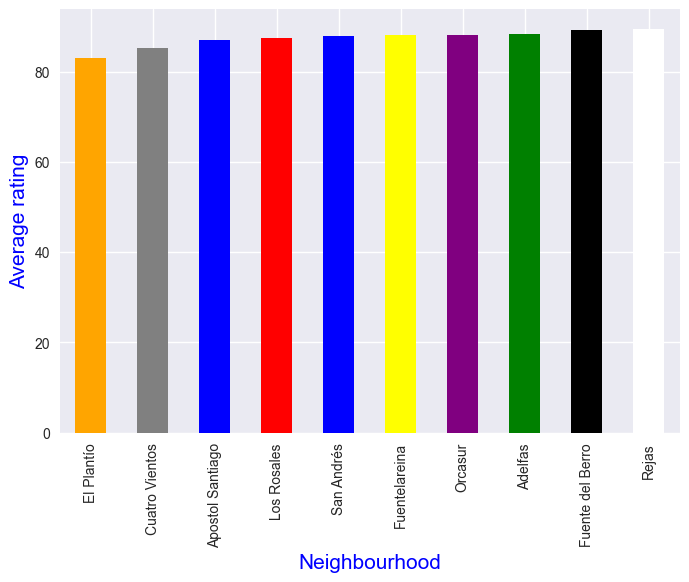

In [43]:
last_10_neigh_rate.plot(kind='bar',color = ['orange','grey','blue','red','blue','yellow','purple','green','black','white'])
plt.ylabel('Average rating',size=15,color='blue')
plt.xlabel('Neighbourhood',size=15,color='blue')
plt.show()

The least rated neighbourhood are __El Platino__ and __Cuanto Vientos__

9) Let's look at the price distribution

(array([3.642e+03, 6.368e+03, 3.852e+03, 1.980e+03, 9.550e+02, 6.910e+02,
        4.550e+02, 1.510e+02, 2.130e+02, 1.060e+02, 1.780e+02, 8.900e+01,
        4.100e+01, 1.010e+02, 2.000e+01, 3.400e+01, 1.320e+02, 2.600e+01,
        2.200e+01, 2.000e+01, 5.600e+01, 2.000e+01, 3.000e+00, 2.100e+01,
        9.000e+00, 1.700e+01, 4.500e+01, 7.000e+00, 1.000e+01, 2.000e+00,
        3.000e+01, 7.000e+00, 4.000e+00, 8.300e+01, 0.000e+00, 4.000e+00,
        1.300e+01, 3.900e+01, 2.000e+00, 1.000e+00, 1.600e+01, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 2.000e+01, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+0

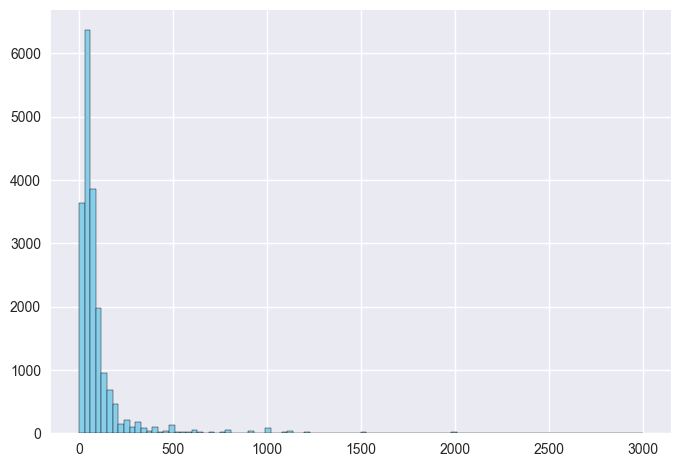

In [44]:
plt.hist(listing['price'], bins=100, color='skyblue', edgecolor='black')

the main part of flat are between $8 and $1100, if we take a slice without the outlier (let's say superior to $1100) let's see more precise results 

Let's create some price categories and count the importance of each category to make it more understandable

In [45]:
listing['price_cat'] = pd.qcut(listing.price,q=[0,0.25,0.5,0.75,0.95,1]
                               ,labels=['cheap','below_average','above_average','expensive','very_expensive'])

Text(0.5, 1.0, 'Price categories distribution')

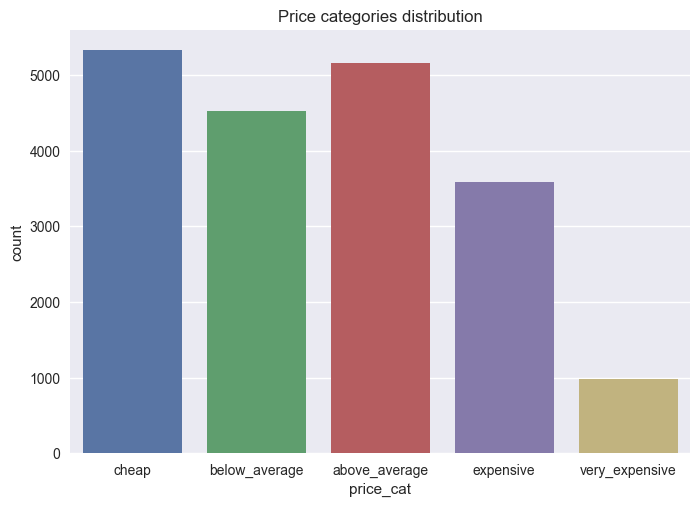

In [46]:
sns.countplot(listing,x='price_cat')
plt.title('Price categories distribution')

10) Is there a correlation between the review_scores_rating and the price of listings?

c:\Users\chimb\Desktop\Portefolio\Madrid rbnb\roro\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


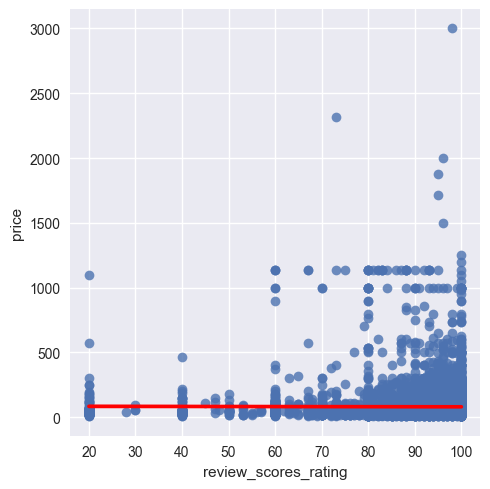

In [47]:
sns.lmplot(listing,x='review_scores_rating',y='price',line_kws={"color": "red"})

No real corrolation between scores and prices

11) How often is WIFI proposed among amenities?

In [48]:
def contains_wifi(string):
    return 'Wifi' in string

In [49]:
listing['is_wifi'] = listing.amenities.apply(contains_wifi)

In [50]:
print(len(listing[listing.is_wifi == True])/len(listing)) #print number of elements with wifi over the number of total elements

0.945191471956644


__94.52%__ of rooms have WIFI

12) Is there a relationship between the host_response_time and the host_response_rate?

In [51]:
listing.host_response_time.unique()

array(['within an hour', nan, 'a few days or more', 'within a few hours',
       'within a day'], dtype=object)

Let's encode the host_response_time in order to use the corr() function.

In [52]:
listing['host_response_time_encoded'] = listing.host_response_time.replace({'within an hour':0,'a few days or more':3,'within a few hours':1,'within a day':2})

let's convert the host_response_rate in float between 0 and 1

In [53]:
listing.host_response_rate.unique()

array(['100%', nan, '82%', '33%', '0%', '67%', '77%', '87%', '90%', '86%',
       '96%', '80%', '92%', '60%', '88%', '70%', '17%', '83%', '50%',
       '91%', '30%', '56%', '97%', '8%', '94%', '85%', '75%', '69%',
       '29%', '98%', '74%', '72%', '38%', '93%', '95%', '64%', '40%',
       '78%', '89%', '57%', '20%', '22%', '15%', '71%', '99%', '81%',
       '43%', '14%', '42%', '76%', '13%', '79%', '11%', '10%', '58%',
       '46%', '63%', '23%', '61%', '25%', '51%', '37%', '27%', '39%',
       '5%', '9%', '68%', '59%', '44%', '7%', '18%', '55%', '53%'],
      dtype=object)

In [54]:
listing.host_response_rate = listing.host_response_rate.str.replace('%','')

In [55]:
listing.host_response_rate = listing.host_response_rate.astype(float)

In [56]:
listing.host_response_rate = listing.host_response_rate/100

In [57]:
listing.host_response_rate.unique()

array([1.  ,  nan, 0.82, 0.33, 0.  , 0.67, 0.77, 0.87, 0.9 , 0.86, 0.96,
       0.8 , 0.92, 0.6 , 0.88, 0.7 , 0.17, 0.83, 0.5 , 0.91, 0.3 , 0.56,
       0.97, 0.08, 0.94, 0.85, 0.75, 0.69, 0.29, 0.98, 0.74, 0.72, 0.38,
       0.93, 0.95, 0.64, 0.4 , 0.78, 0.89, 0.57, 0.2 , 0.22, 0.15, 0.71,
       0.99, 0.81, 0.43, 0.14, 0.42, 0.76, 0.13, 0.79, 0.11, 0.1 , 0.58,
       0.46, 0.63, 0.23, 0.61, 0.25, 0.51, 0.37, 0.27, 0.39, 0.05, 0.09,
       0.68, 0.59, 0.44, 0.07, 0.18, 0.55, 0.53])

Let's do the same with acceptance rate.

In [58]:
listing.host_acceptance_rate = listing.host_acceptance_rate.str.replace('%','')

In [59]:
listing.host_acceptance_rate = listing.host_acceptance_rate.astype(float)

In [60]:
listing.host_acceptance_rate = listing.host_acceptance_rate/100

Let's remind that 'within an hour':0,'a few days or more':3,'within a few hours':1,'within a day':2

c:\Users\chimb\Desktop\Portefolio\Madrid rbnb\roro\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


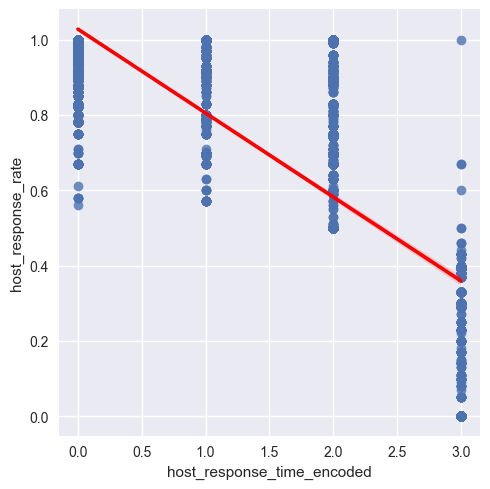

In [61]:
sns.lmplot(listing,x='host_response_time_encoded',y='host_response_rate',line_kws={"color": "red"})

__So the faster the host respond, the better the response rate is. There is in conclusion a corrolation.__

13) How does the instant_bookable feature affect the price and availability of listings?

In [62]:
listing.instant_bookable.unique()

array(['f', 't'], dtype=object)

Let's encode

In [63]:
listing.instant_bookable.replace({'f':0,'t':1},inplace=True)

In [64]:
listing.instant_bookable = listing.instant_bookable.astype('int')

In [65]:
listing[['instant_bookable','price']].corr('spearman')

,instant_bookable,price
instant_bookable,1.000,0.131
price,0.131,1.000


A Spearman correlation coefficient of 0.1316 suggests a weak positive monotonic relationship between the instant_bookable and the price. This means that there is a tendency for the variables to increase together in a consistent but not necessarily linear manner.

In [66]:
listing[['instant_bookable','availability_30']].corr('spearman')

,instant_bookable,availability_30
instant_bookable,1.00000,0.00489
availability_30,0.00489,1.00000


No real link here

14) Let's search for a potential link with scores_rating 

First let's finish encoding all the last attributes needed for further analysis

let's encode the neighbourhood_cleansed and neighbourhood_group_cleansed

In [67]:
import sklearn

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

listing['neighborhood_encoded'] = label_encoder.fit_transform(listing['neighbourhood_cleansed'])

listing['neighborhood_group_encoded'] = label_encoder.fit_transform(listing['neighbourhood_group_cleansed'])

Then let's encode the room_type, host_is_superhost, host_has_profile_pic and host_identity_verified

In [69]:
listing['room_type_encode'] = listing.room_type.replace({'Private room':0,'Entire home/apt':1,'Shared room':2,'Hotel room':3})

In [70]:
listing['host_is_superhost_encoded'] = listing.host_is_superhost.replace({'t':1,'f':0})

In [71]:
listing['host_has_profile_pic_encoded'] = listing.host_has_profile_pic.replace({'t':1,'f':0})

In [72]:
listing['host_identity_verified_encoded'] = listing.host_identity_verified.replace({'t':1,'f':0})

Let's run a corr() function on review_scores_rating to find corrolation

In [73]:
listing.select_dtypes(include='number').corr('spearman')['review_scores_rating'].to_frame()

,review_scores_rating
id,0.067907
scrape_id,NaN
host_id,-0.012785
host_response_rate,0.160455
host_acceptance_rate,-0.011788
host_listings_count,-0.218581
host_total_listings_count,-0.218581
latitude,0.047194
longitude,0.035968
accommodates,-0.083901


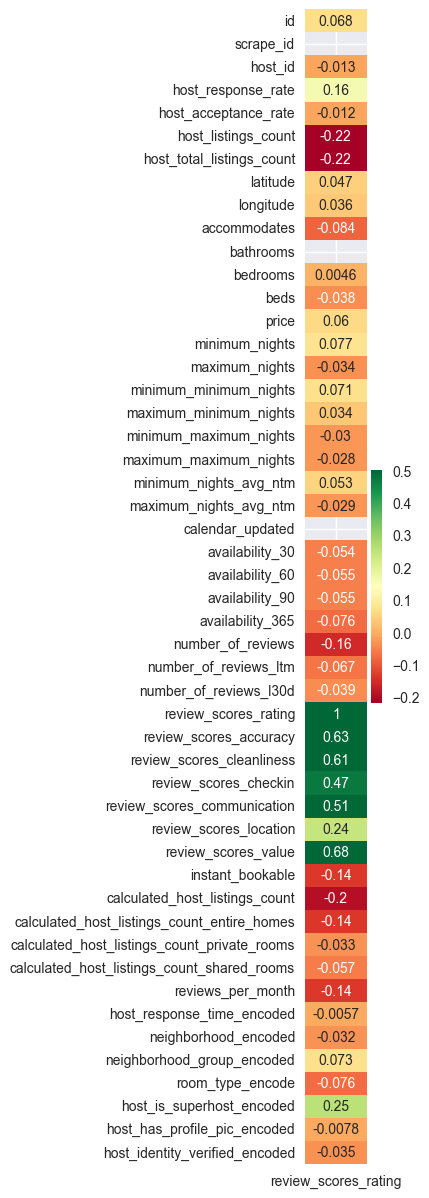

In [74]:
plt.figure(figsize=(1,15))
custom_palette = sns.color_palette("RdYlGn", as_cmap=True)
sns.heatmap(listing.select_dtypes(include='number').corr('spearman')['review_scores_rating'].to_frame()
            ,cmap=custom_palette,annot=True,vmax=0.5)
plt.show()

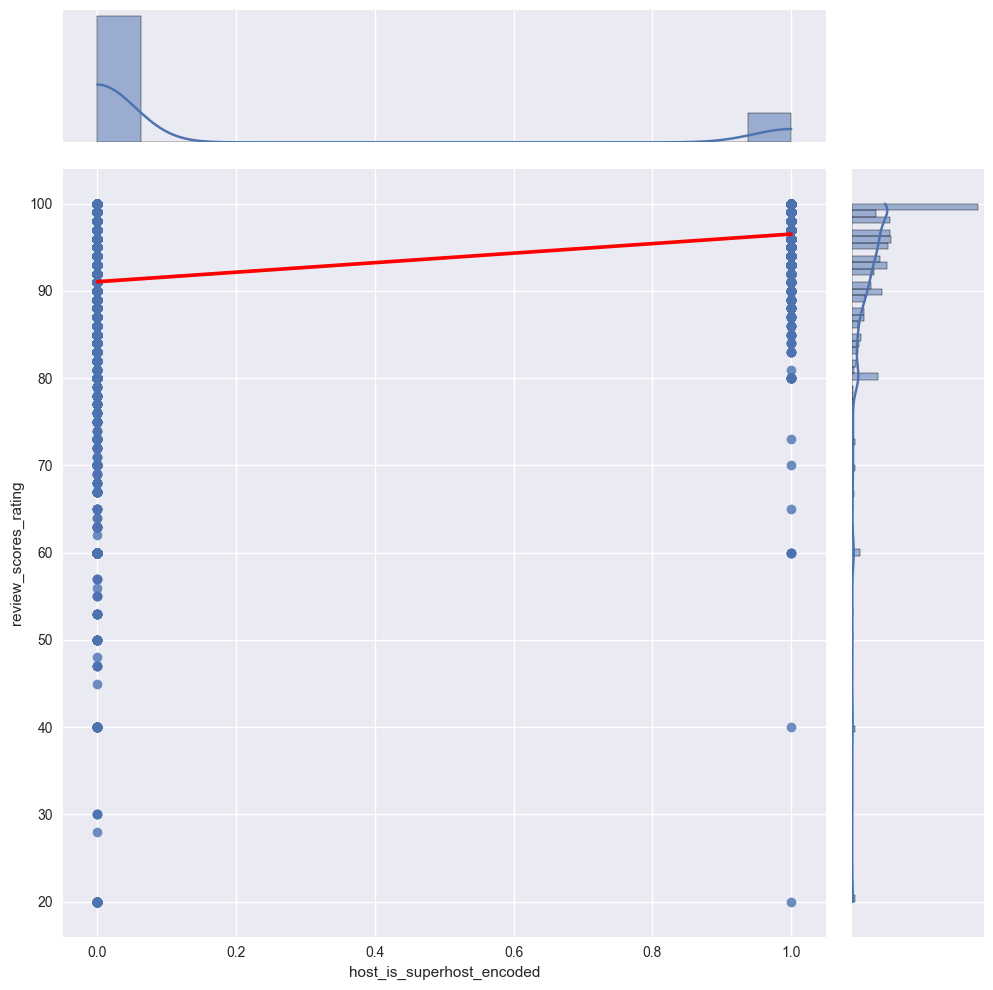

In [75]:
sns.jointplot(listing,x='host_is_superhost_encoded',y='review_scores_rating',kind='reg',line_kws={"color": "red"},height=10)

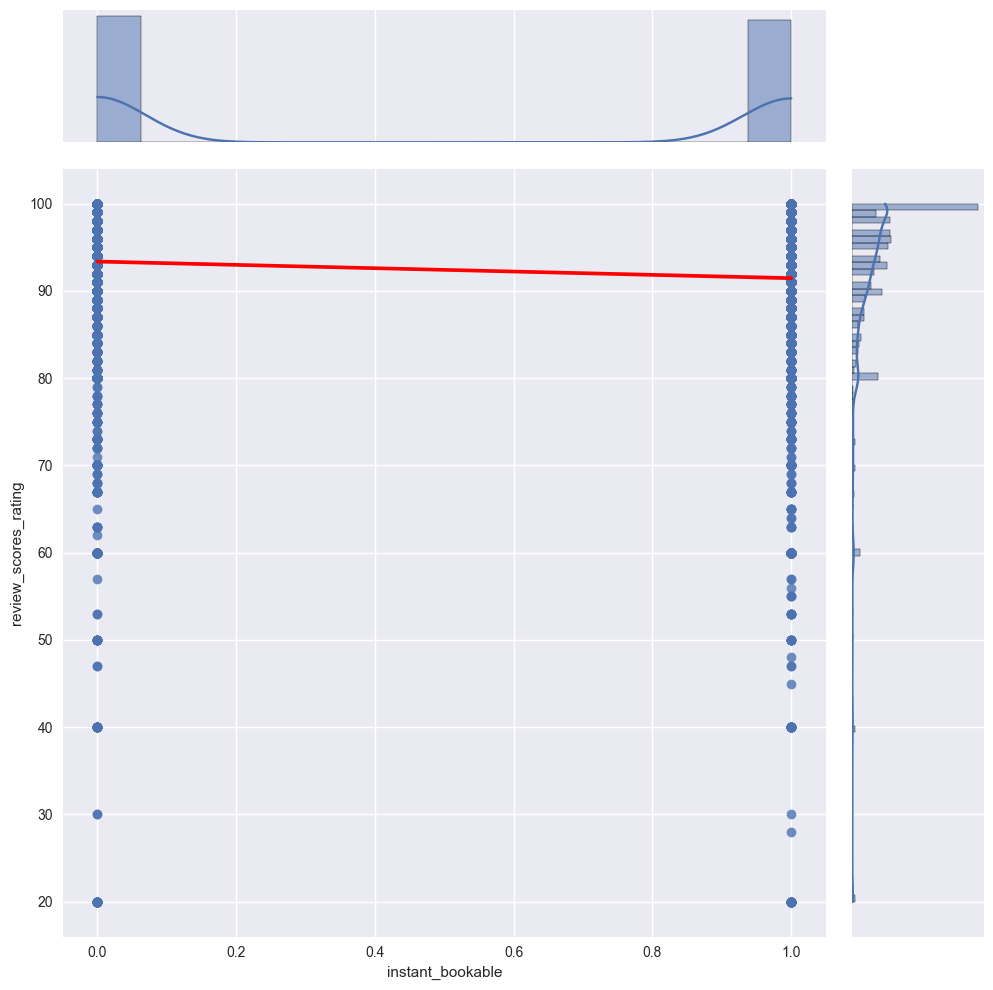

In [76]:
sns.jointplot(listing,x='instant_bookable',y='review_scores_rating',kind='reg',line_kws={"color": "red"},height=10)

There seem to be a low corrolation between the review_scores_rating and the __host response rate__. Same with __instant bookable__.

There seem to be a low negative corrolation between the __host_listing_counts and the scores__. 

There is also a positive corrolation between __host_is_superhost__ and the scores.

The corrolation found between the other review scores attribute the rating are logical and don't need further explanations.


In [77]:
listing[['room_type_encode','review_scores_rating']].corr('spearman')

,room_type_encode,review_scores_rating
room_type_encode,1.000000,-0.076345
review_scores_rating,-0.076345,1.000000


__No big corrolation between room type and scores to be noted.__

15) Let's now check for price corrolations

In [78]:
listing[['neighborhood_encoded','price']].corr('spearman')

,neighborhood_encoded,price
neighborhood_encoded,1.000000,0.008243
price,0.008243,1.000000


This results is logical because as we remember in the precedent question, even in expensive neighbourhood such as Canillejas which is one of the most expensive, the price distribution is very large, and the average in some district is higher just because of some few very expensive rooms. 

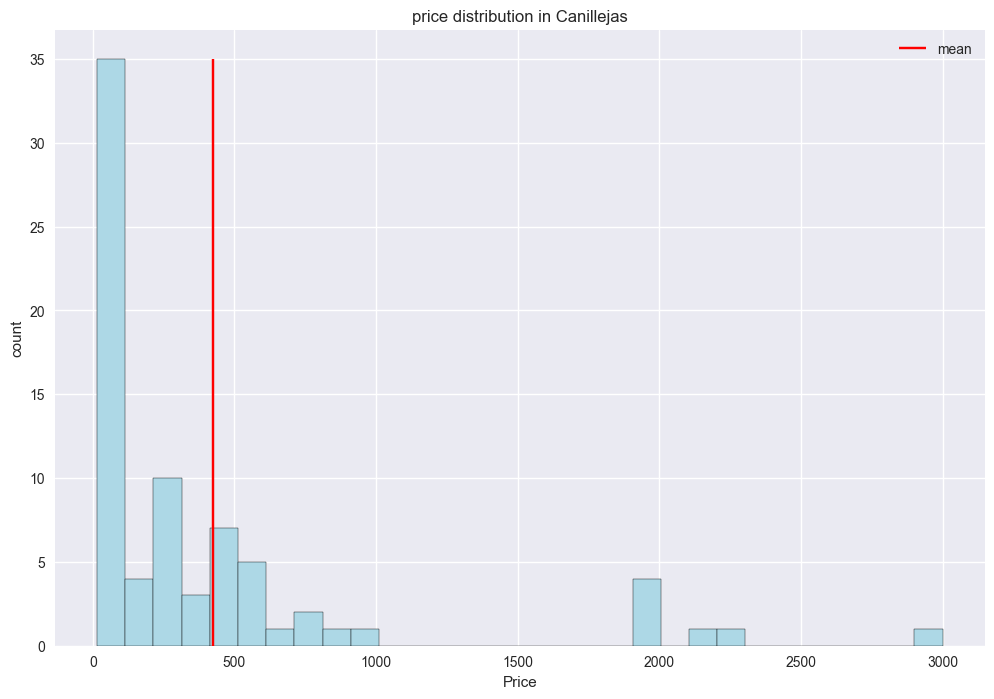

In [93]:
plt.figure(figsize=(12,8))
plt.hist(listing[listing.neighbourhood_cleansed == 'Canillejas']['price'],bins=30,color='lightblue', edgecolor='black')
plt.vlines(np.mean(listing[listing.neighbourhood_cleansed == 'Canillejas']['price']),ymin=0,ymax=35,label='mean',colors='red')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.title('price distribution in Canillejas')
plt.show()

Same in Aluche, the least expensive

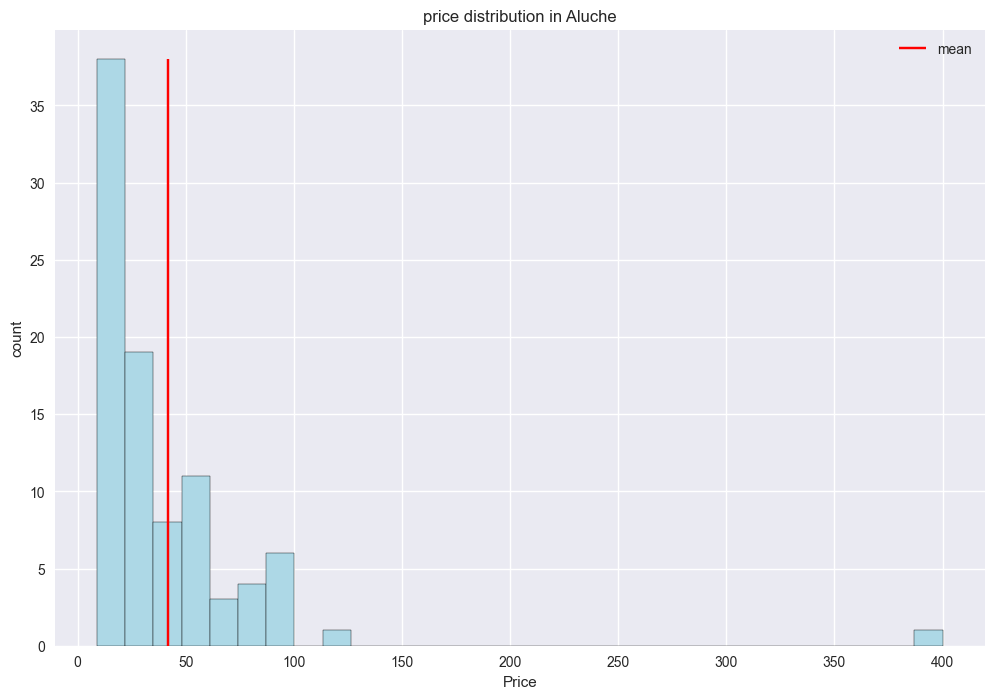

In [95]:
plt.figure(figsize=(12,8))
plt.hist(listing[listing.neighbourhood_cleansed == 'Aluche']['price'],bins=30,color='lightblue', edgecolor='black')
plt.vlines(np.mean(listing[listing.neighbourhood_cleansed == 'Aluche']['price']),ymin=0,ymax=38,label='mean',colors='red')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.title('price distribution in Aluche')
plt.show()

So low corrolation between neighbourhood and price as even in expensive neighbourhood we can still find a correct amount cheap rooms and vice-versa.

Let's run it on every numerical attribute to find some impact on the price.

In [81]:
listing.select_dtypes(include='number').corr('spearman')['price'].to_frame()

,price
id,-0.036336
scrape_id,NaN
host_id,-0.034920
host_response_rate,0.055446
host_acceptance_rate,0.035962
host_listings_count,0.092540
host_total_listings_count,0.092540
latitude,0.137634
longitude,0.024793
accommodates,0.599009


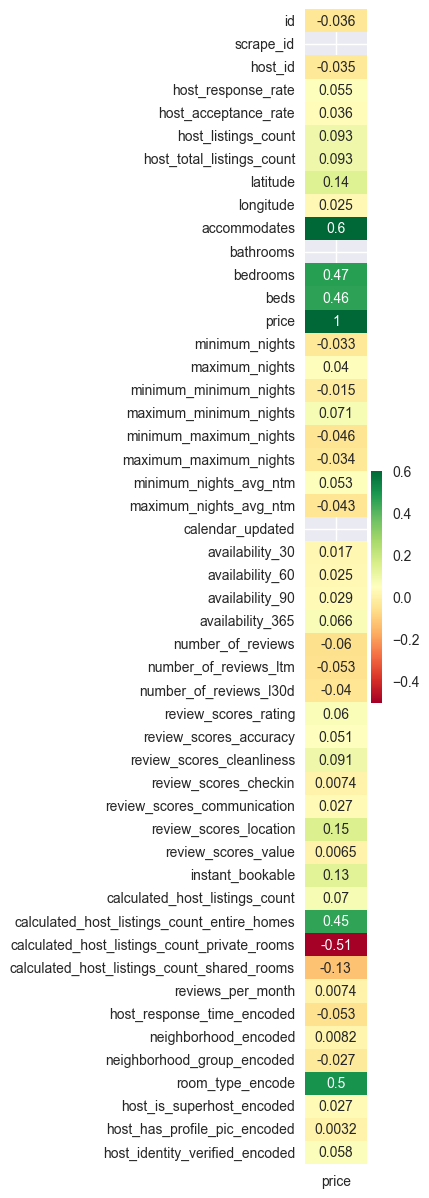

In [82]:
plt.figure(figsize=(1,15))
custom_palette = sns.color_palette("RdYlGn", as_cmap=True)
sns.heatmap(listing.select_dtypes(include='number').corr('spearman')['price'].to_frame()
            ,cmap=custom_palette,annot=True,vmax=0.6)
plt.show()

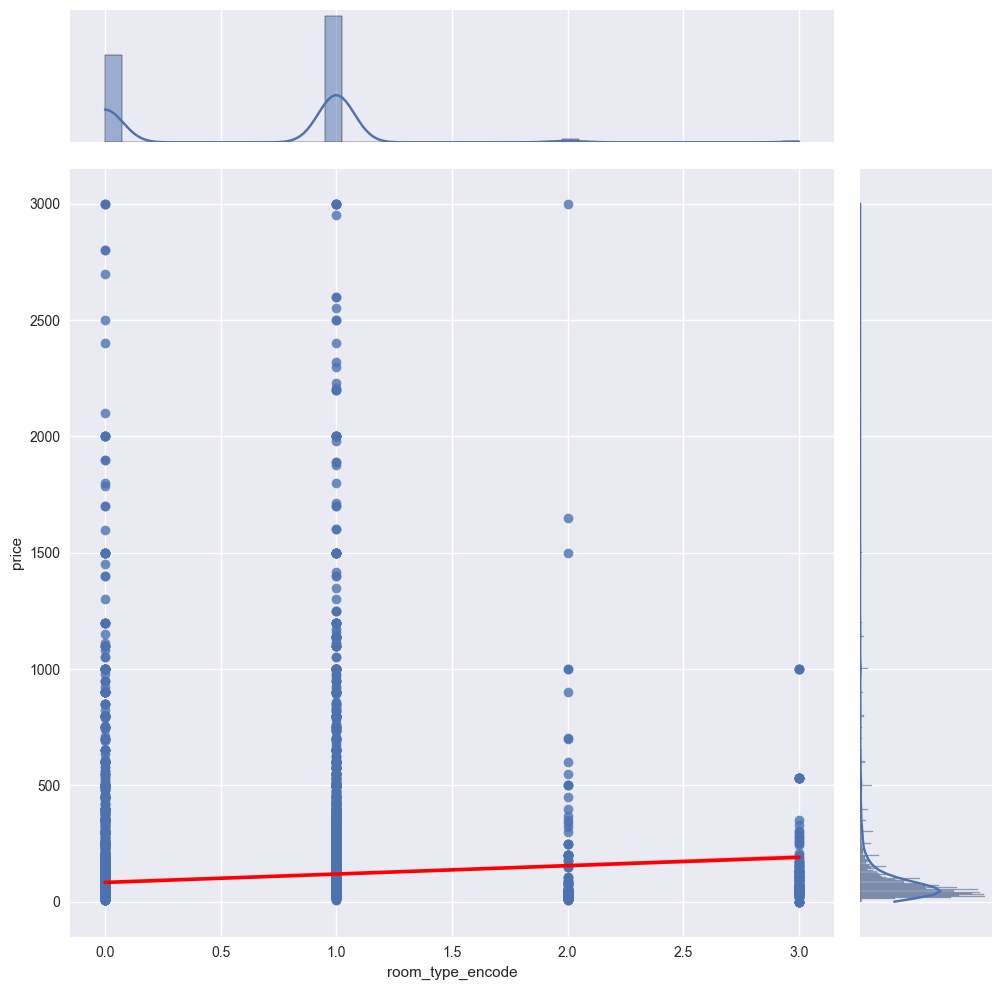

In [83]:
sns.jointplot(listing,x='room_type_encode',y='price',kind='reg',line_kws={"color": "red"},height=10)

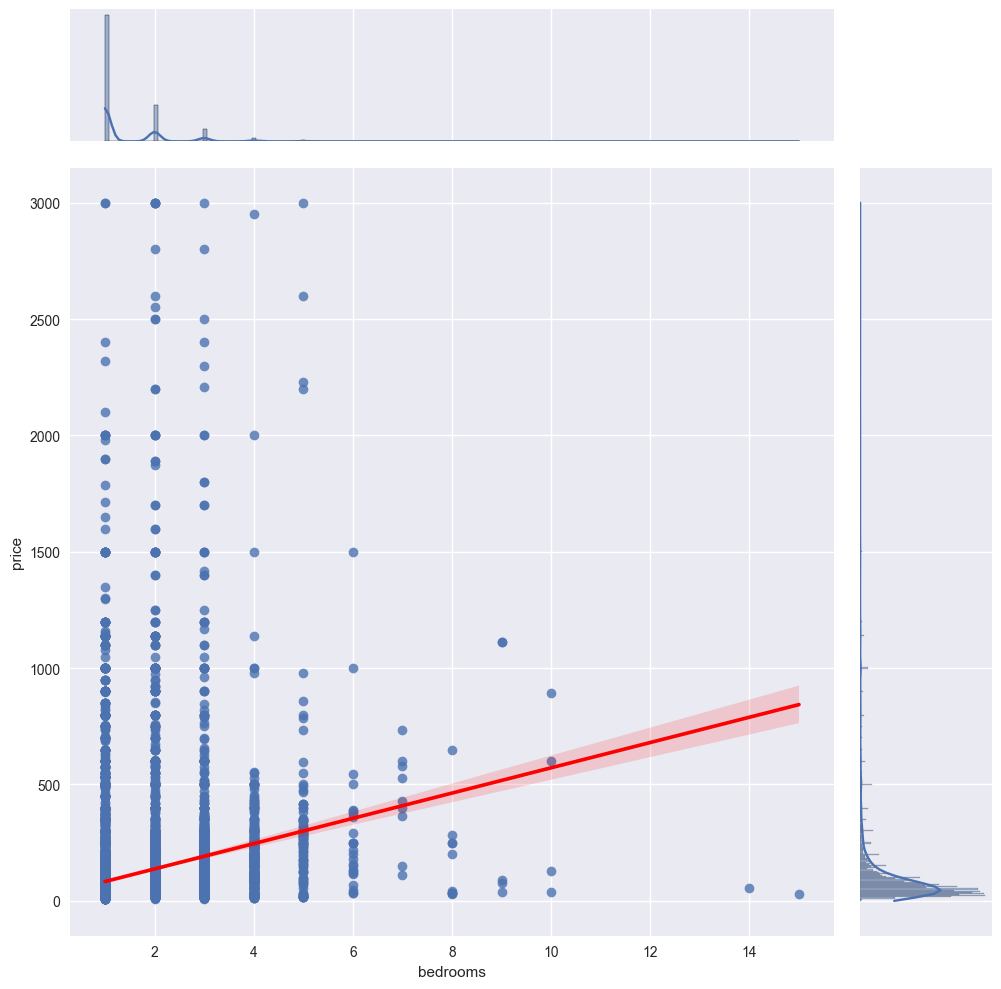

In [84]:
sns.jointplot(listing,x='bedrooms',y='price',kind='reg',line_kws={"color": "red"},height=10)

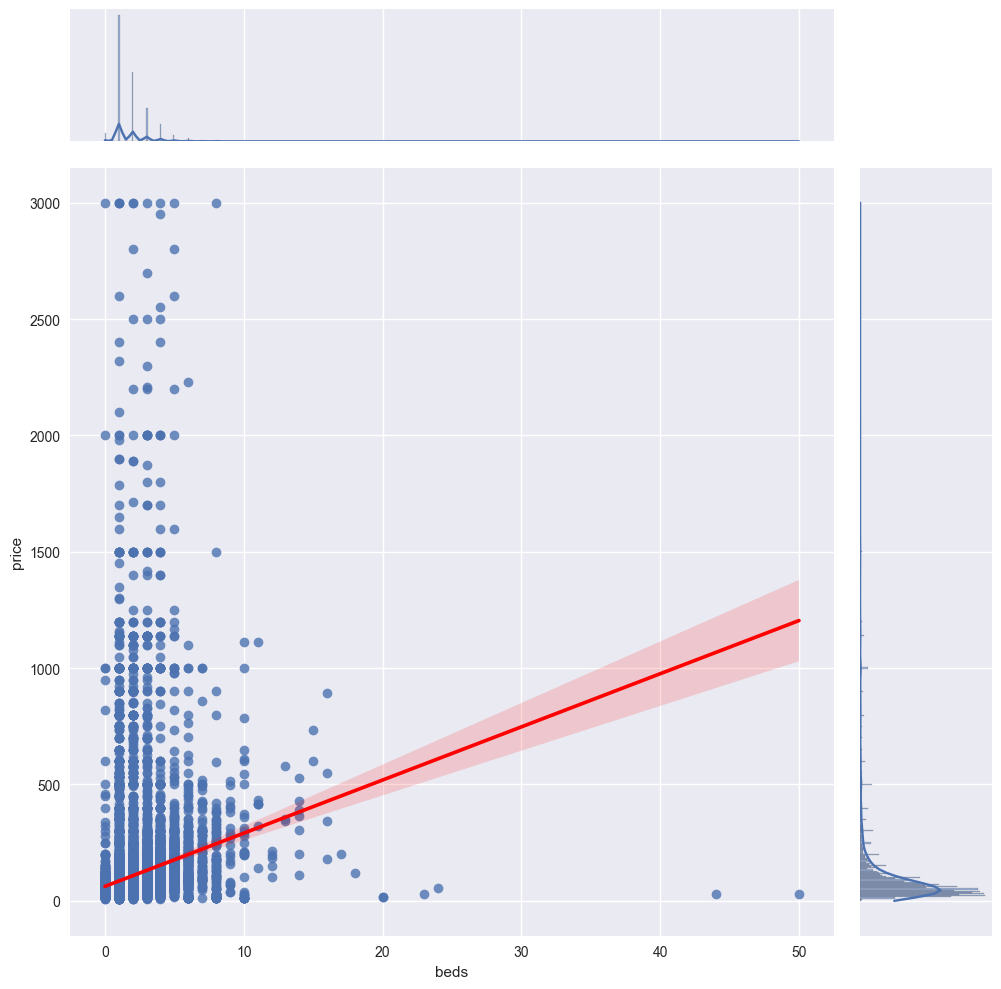

In [85]:
sns.jointplot(listing,x='beds',y='price',kind='reg',line_kws={"color": "red"},height=10)

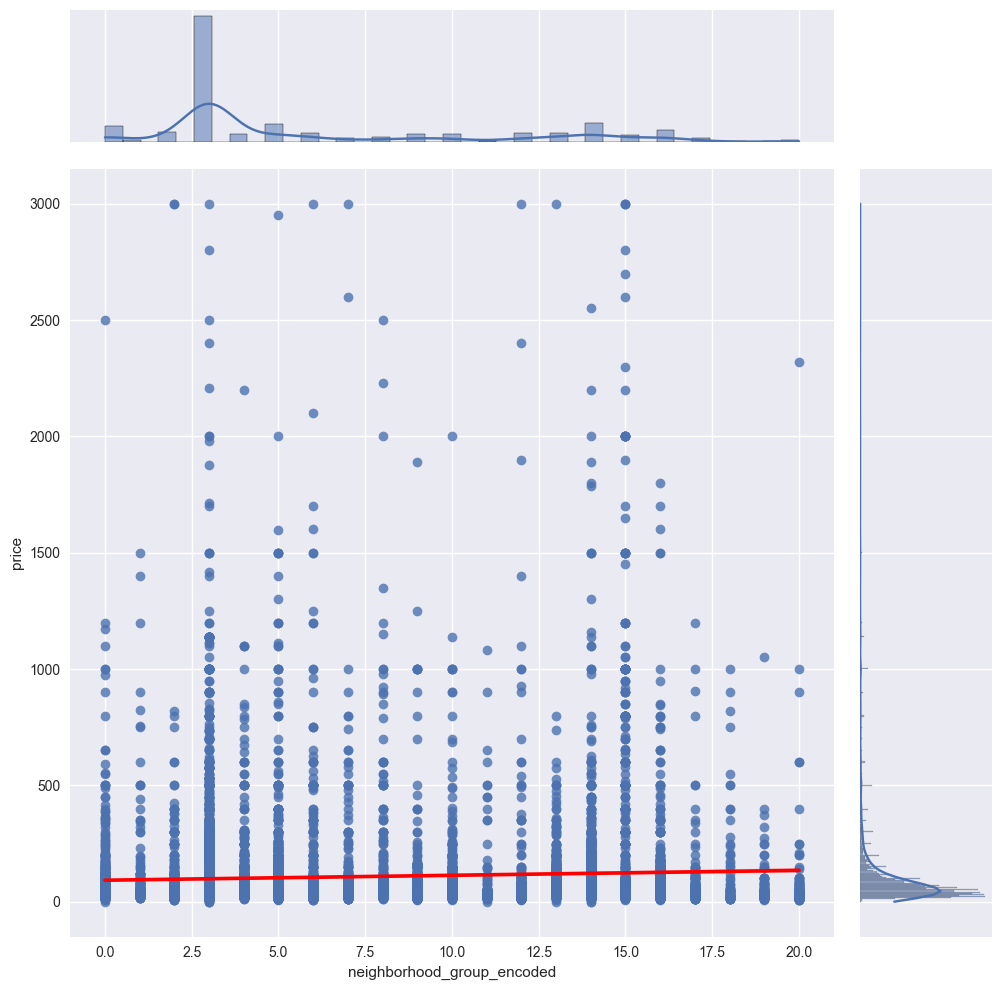

In [86]:
sns.jointplot(listing,x='neighborhood_group_encoded',y='price',kind='reg',line_kws={"color": "red"},height=10)

The attributes with the biggest corrolation with the price are the __accomodates, the number of beds, number of bedrooms and room type__. 

Also the __calculated_hist_listing_entire_homes__ as the entire homes are more expensive, and the __room_type__ attribute as well. 

__Instant_bookable__ also has a trend shown.

So there is a trend between the price and the size or type of the flat rented, and not so big of a trend with the neighbourhood selected.

Let's convert this table to csv for further data visualisation on Tableau using SQL requests.

In [87]:
listing.drop(columns='license',inplace=True)

In [88]:
listing.to_csv('Madrid_Tableau.csv',index=False)

__Conclusion about my insights with Python__

In conclusion, the insights gained from the dataset on Airbnb listings in Madrid provide valuable information about various aspects of the market. Firstly, we identified that the most expensive neighborhoods in Madrid are Hellin and Rosas. These neighborhoods stand out due to the diversity of room options available in the dataset, reflecting a wide range of pricing. Conversely, Butarque, Aeropuerto, and Aluche are the most affordable neighborhoods for Airbnb accommodations.

The dataset revealed that the average number of bedrooms in Madrid's Airbnb listings is approximately 1.44 bedrooms, with the most common number of bedrooms falling within the range of 1 to 2. Moreover, the predominant room types are Private room and Entire home, suggesting that travelers often opt for these accommodation options.

When it comes to quality, the average score for Airbnb listings in Madrid is 92.46, indicating a generally high level of guest satisfaction. Hellin and Amposta emerge as the most popular neighborhoods, while El Platino and Cuanto Vientos receive lower ratings.

Connectivity is also essential to Airbnb guests, with a notable 94.52% of listings offering WiFi. Additionally, we found a positive correlation between host response time and response rate, underlining the importance of prompt communication for higher ratings.

Analyzing correlations, we observed a weak positive monotonic relationship (Spearman correlation coefficient of 0.1316) between instant bookability and price, suggesting that these variables tend to increase together, though not necessarily in a linear fashion.

Furthermore, there appears to be low correlations between review scores, host response rate, and instant bookability. However, a positive correlation exists between being a superhost and higher review scores, reinforcing the significance of being a top-rated host.

Notably, attributes such as accommodates, number of beds, number of bedrooms, room type, and calculated historical listing of entire homes show the most significant correlations with price. Instant bookability also demonstrates a discernible trend concerning pricing. Overall, these findings emphasize that property size, type, and certain host attributes play a more substantial role in determining listing prices compared to the selected neighborhood.